## 1.- Recolección / Carga de datos

In [6]:
# Importa la biblioteca pandas y la renombra como pd
import pandas as pd

# Importa la biblioteca numpy y la renombra como np
import numpy as np

# Importa la biblioteca matplotlib.pyplot y la renombra como plt
import matplotlib.pyplot as plt

# Importa la biblioteca seaborn y la renombra como sns
import seaborn as sns


In [8]:
# Importa el módulo glob para trabajar con patrones de nombres de archivos
import glob


In [12]:
# Utiliza la función glob del módulo glob para obtener una lista de archivos que coincidan con el patrón especificado,
# en este caso son los archivos .csv
glob.glob(r'C:\Users\gmejia\Documents\RESPALDO\Doc_GeMR\Python\Time Series Project\S&P_resources\individual_stocks_5yr/*csv')

['C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\

In [14]:
# Utiliza la función glob del módulo glob para obtener la lista de archivos que coincidan con el patrón y calcula su longitud
# Podemos ver la cantidad de archivos con esta función
len(glob.glob(r'C:\Users\gmejia\Documents\RESPALDO\Doc_GeMR\Python\Time Series Project\S&P_resources\individual_stocks_5yr/*csv'))

505

In [15]:
# Solo queremos hacer en este caso el análisis de algunos de los archivos, los correspondientes a los grandes de I.T :
# Apple, Amazon, Google, Microsoft


In [17]:
# Lista de rutas de archivos de empresas
company_list = [
    r'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv'
    
]

In [18]:
# Importa la biblioteca warnings para gestionar advertencias y utiliza filterwarnings para ignorar todas las advertencias futuras
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [19]:
# Inicializa un DataFrame vacío llamado all_data
all_data = pd.DataFrame()

# Itera sobre la lista de rutas de archivos de empresas
for file in company_list:
    
    # Lee el archivo CSV actual y lo almacena en current_df
    current_df = pd.read_csv(file)
    
    # Añade las filas del DataFrame actual a all_data, ignorando los índices originales
    all_data = current_df.append(all_data, ignore_index=True)



In [20]:
# Obtiene las dimensiones del DataFrame all_data (número de filas y columnas)
all_data.shape


(4752, 7)

In [21]:
# Muestra las primeras 6 filas del DataFrame all_data
all_data.head(6)


,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [22]:
# Obtiene los valores únicos de la columna 'Name' en el DataFrame all_data
all_data['Name'].unique()


array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

## 2.- Analizando el cambio en el precio de las acciones con el tiempo


In [23]:
# Calcula la suma de valores nulos en cada columna del DataFrame all_data
all_data.isnull().sum()


date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [24]:
# Obtiene los tipos de datos de cada columna en el DataFrame all_data
all_data.dtypes


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [25]:
# Convierte la columna 'date' del DataFrame all_data al formato de fecha y hora de pandas
all_data['date'] = pd.to_datetime(all_data['date'])


In [26]:
# Muestra la columna 'date' del DataFrame all_data, que ya convertimos al formato correcto
all_data['date']


0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [27]:
# Obtiene la lista única de nombres de empresas de la columna 'Name' en el DataFrame all_data
tech_list = all_data['Name'].unique()


In [28]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

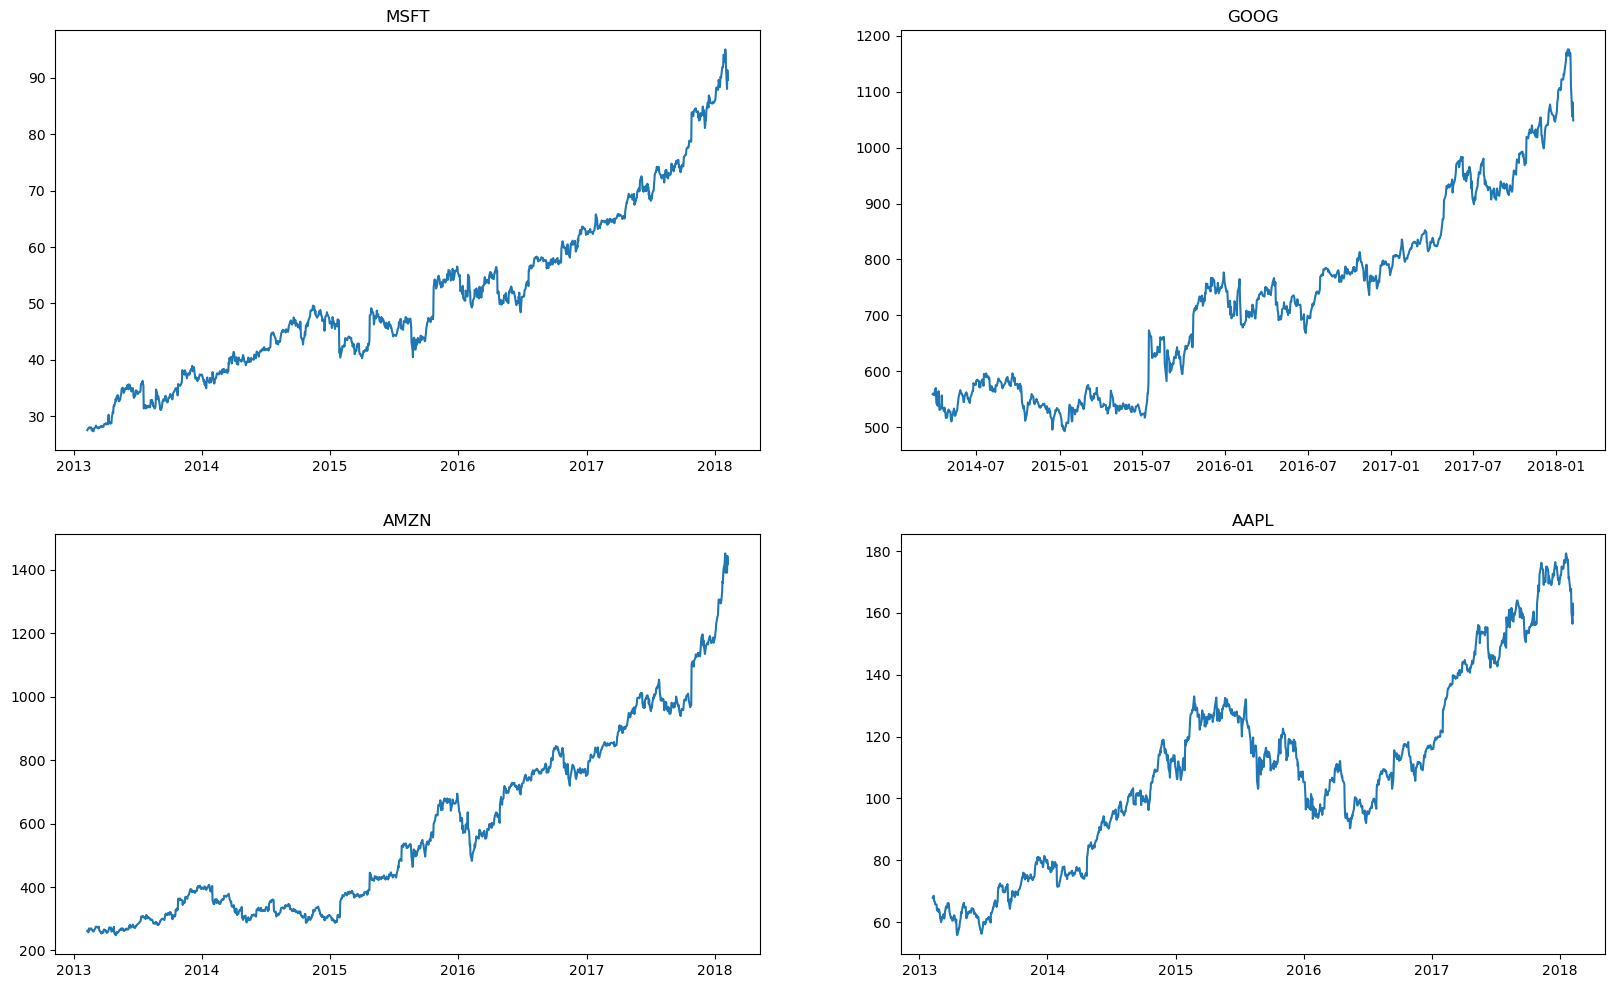

In [29]:
# Crea una figura de tamaño 20x12 pulgadas
plt.figure(figsize=(20, 12))

# Itera sobre las empresas en tech_list y crea un subplot para cada una
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)  # Creación de un subplot para cada acción
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    
    # Grafica la relación "date" vs "close"
    plt.plot(df['date'], df['close'])
    
    # Establece el título del subplot como el nombre de la empresa
    plt.title(company)


## 3.- Media móvil de las diferentes acciones


In [30]:
# Muestra las primeras 15 filas del DataFrame all_data
all_data.head(15)


,date,open,high,low,close,volume,Name
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT


In [31]:
# Calcula la media móvil de la columna 'close' con una ventana de 10 períodos en el DataFrame all_data
all_data['close'].rolling(window=10).mean().head(14)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [33]:
# Los primeros valores de la media móvil con una ventana de 10 períodos contienen NaN debido a la falta de datos previos

In [34]:
# Crea una copia del DataFrame all_data llamada new_data
new_data = all_data.copy()


In [35]:
# Calcula y agrega columnas para las medias móviles de 10, 20 y 50 días a new_data
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()


In [36]:
# Muestra las últimas 7 filas del DataFrame new_data
new_data.tail(7)


,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [37]:
# Establece la columna 'date' como el índice del DataFrame new_data
new_data.set_index('date', inplace=True)


In [38]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


In [39]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

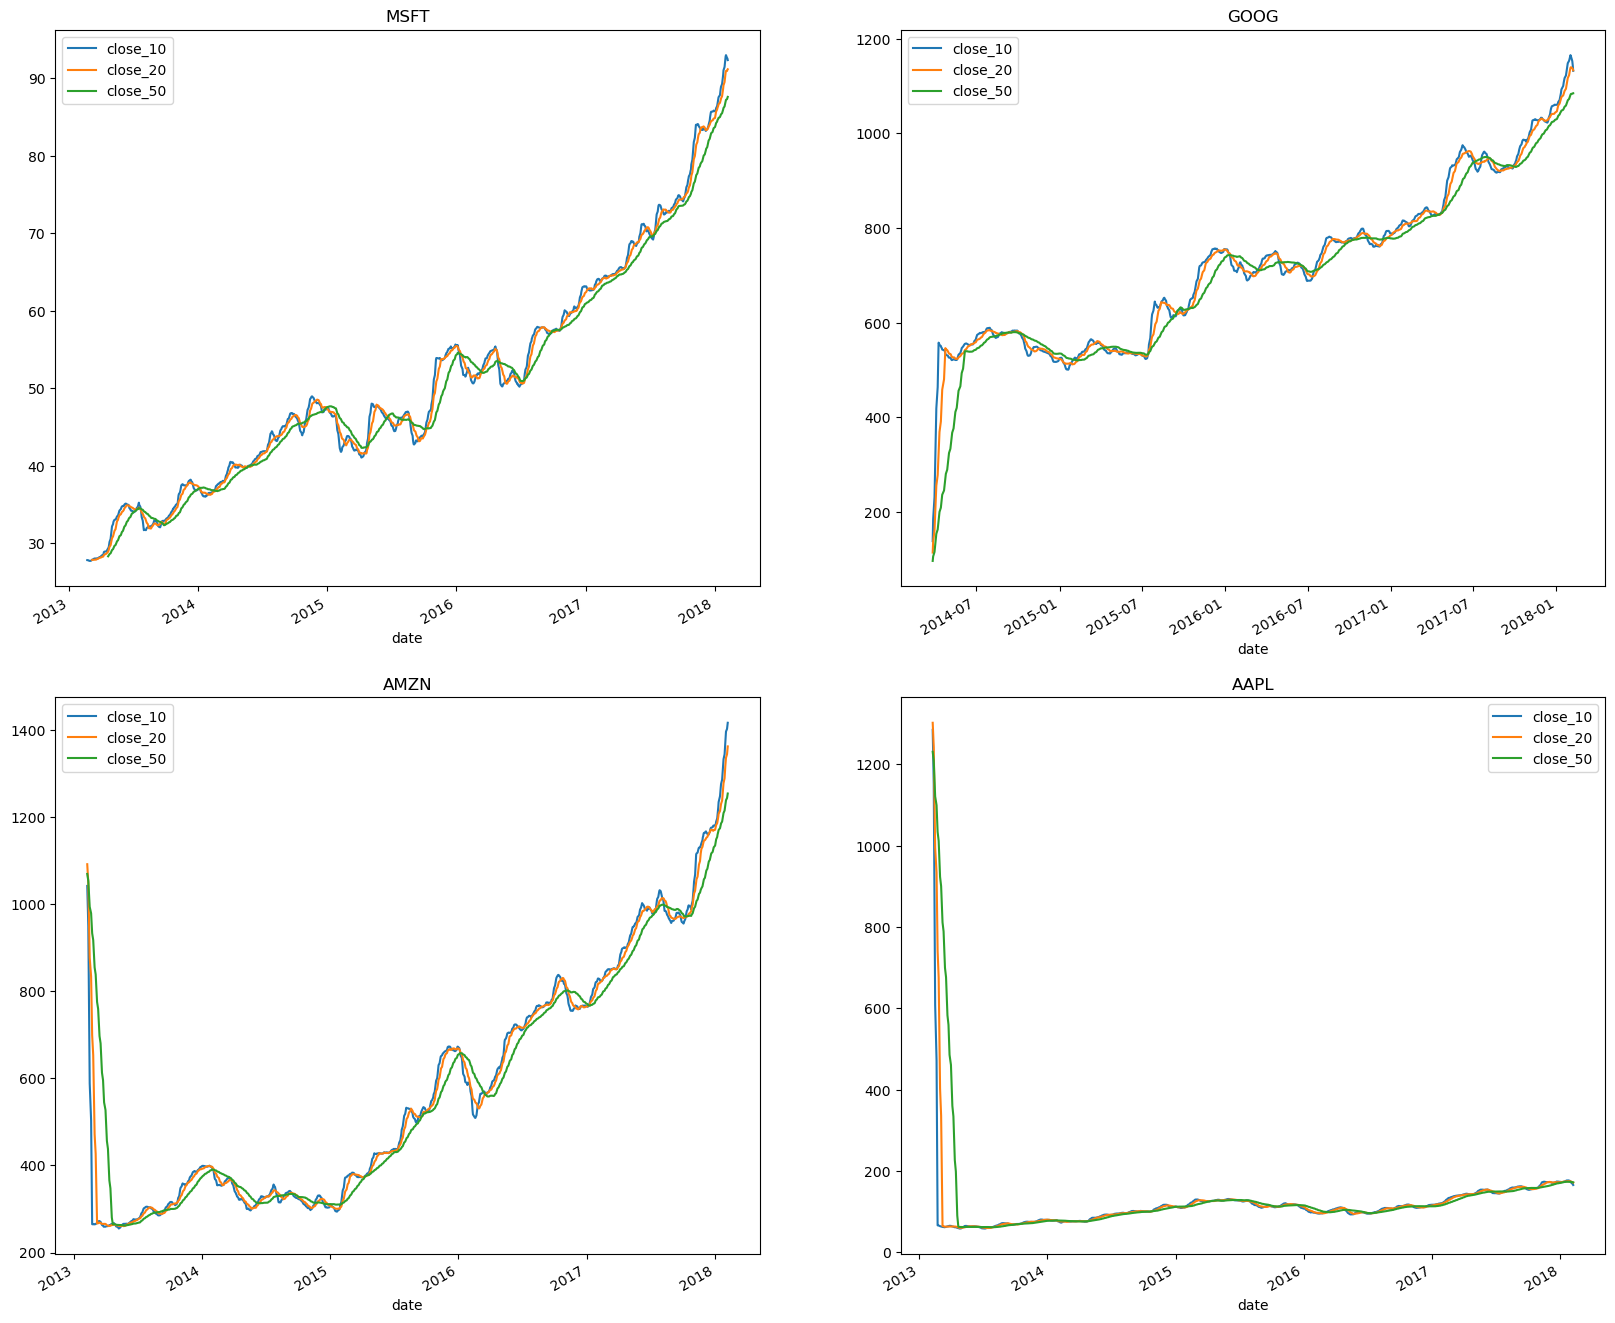

In [44]:
# Crea una figura de tamaño 20x18pulgadas
plt.figure(figsize=(20, 18))

# Itera sobre las empresas en tech_list y crea un subplot para cada una
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)  # Creación de un subplot para cada acción
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    
    # Grafica las medias móviles de 10, 20 y 50 días para cada empresa
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    
    # Establece el título del subplot como el nombre de la empresa
    plt.title(company)


## 4. Analiza el cambio en el precio de cierre de las acciones de Apple (AAPL).
##### Fórmula para el rendimiento diario de las acciones:
    Para calcular cuánto ganaste o perdiste por día para una acción, resta el precio de apertura del precio de cierre.
    Luego, multiplica el resultado por la cantidad de acciones que posees en la empresa.



In [46]:
company_list

['C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [47]:
apple = pd.read_csv(r'C:\\Users\\gmejia\\Documents\\RESPALDO\\Doc_GeMR\\Python\\Time Series Project\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',)

In [48]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [50]:
# Muestra la columna 'close' del DataFrame correspondiente a las acciones de Apple (AAPL)
apple['close']


0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [51]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [52]:
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

In [53]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [55]:
# Importa la biblioteca plotly express y la renombra como px
import plotly.express as px


In [60]:
px.line(apple , x="date" , y ="Daily return(in %)")

## 5.- Realizando un análisis de remuestreo del precio de cierre


    Antes de realizar el remuestreo, primero debes convertir la característica de fecha 'date' en el 'índice de fila'
    para que puedas remuestrear los datos de varias maneras:
    a. Anual ('Y'),
    b. Trimestral ('Q'),
    c. Mensual ('M'),
    d. Semanal ('W'),
    e. Diario ('D'),
    f. Minutos ('3T'),
    g. Bins de 30 segundos ('30S'),
    h. Remuestreo cada 17 minutos ('17min').


In [61]:
# Obtiene los tipos de datos de cada columna en el DataFrame correspondiente a las acciones de Apple (AAPL)
apple.dtypes


date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [62]:
# Convierte la columna 'date' del DataFrame correspondiente a las acciones de Apple (AAPL) al formato de fecha y hora de pandas
apple['date'] = pd.to_datetime(apple['date'])


In [63]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [64]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [65]:
# Establece la columna 'date' como el índice del DataFrame correspondiente a las acciones de Apple (AAPL)
apple.set_index('date', inplace=True)


In [66]:
apple.head(4)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [67]:
# Realiza un remuestreo mensual del precio de cierre, calculando la media
apple['close'].resample('M').mean()


date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

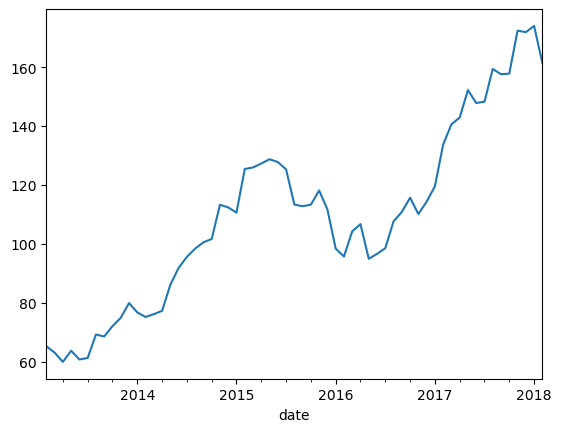

In [68]:
# Realiza un remuestreo mensual del precio de cierre, calculando la media, y grafica la serie temporal resultante
apple['close'].resample('M').mean().plot()


In [69]:
# Realiza un remuestreo anual del precio de cierre, calculando la media
apple['close'].resample('Y').mean()


date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

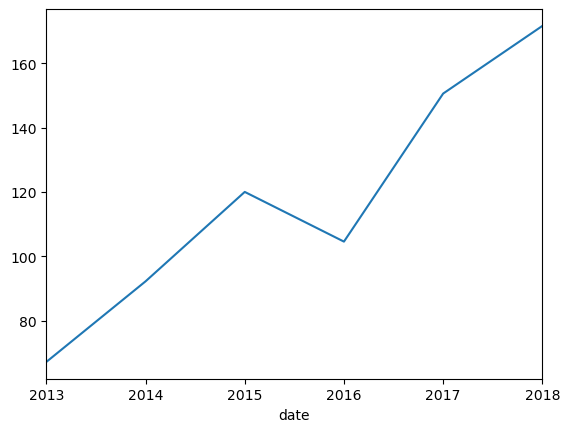

In [71]:
# Realiza un remuestreo anual del precio de cierre, calculando la media, y grafica la serie temporal resultante
apple['close'].resample('Y').mean().plot()


In [72]:
# Realiza un remuestreo trimestral del precio de cierre, calculando la media
apple['close'].resample('Q').mean()


date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

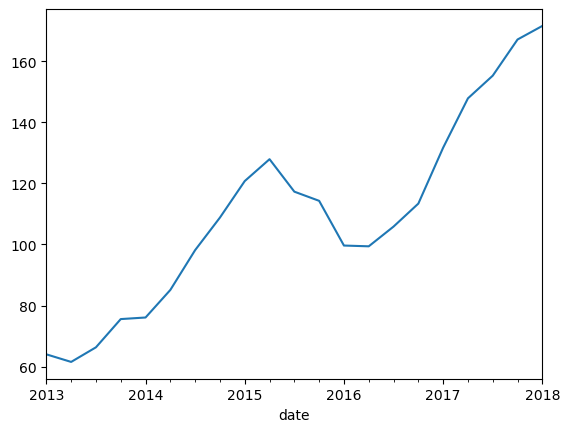

In [73]:
# Realiza un remuestreo trimestral del precio de cierre, calculando la media, y grafica la serie temporal resultante
apple['close'].resample('Q').mean().plot()


## 6.- Verificar si los precios de cierre de estas empresas tecnológicas (Amazon, Apple, Google, Microsoft) están correlacionados


In [74]:
company_list

['C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [76]:
# Accede al nombre de la primera empresa en la lista de empresas
company_list[0]


'C:\\\\Users\\\\gmejia\\\\Documents\\\\RESPALDO\\\\Doc_GeMR\\\\Python\\\\Time Series Project\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [77]:
# Lee los datos de las empresas tecnológicas: Apple (app), Amazon (amzn), Google (google) y Microsoft (msft)
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])


In [78]:
# Crea un DataFrame vacío llamado closing_price
closing_price = pd.DataFrame()


In [79]:
# Agrega columnas al DataFrame closing_price con los precios de cierre de Apple, Amazon, Google y Microsoft
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']


In [80]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33



    Pair-plot is all about , we can considering some pairs & 
    we are trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))


### Dis-advantages: 
### Can't be used when number of features are high.
### Cannot visualize higher dimensional patterns in 3-D and 4-D. 
### Only possible to view 2D patterns.

### NOTE: the diagonal elements are (histogram) for each feature.

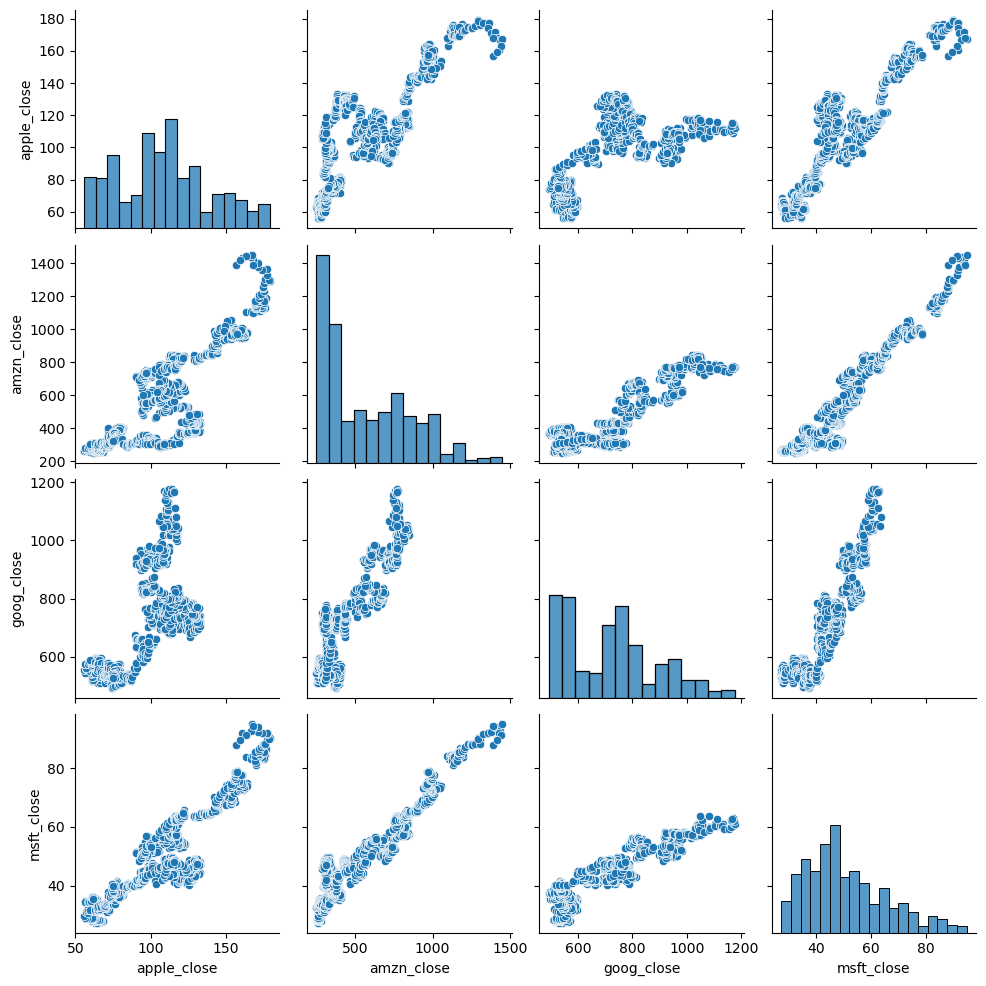

In [82]:
# Utiliza la función pairplot de seaborn para visualizar la relación entre los precios de cierre de las empresas
sns.pairplot(closing_price)


In [83]:
# Calcula la matriz de correlación entre los precios de cierre de las empresas
closing_price.corr()


,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

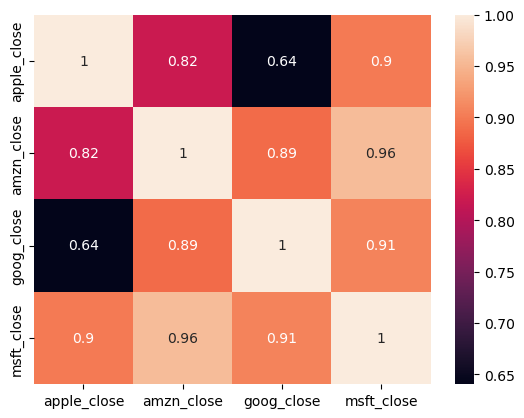

In [84]:
# Utiliza la función heatmap de seaborn para visualizar la matriz de correlación con anotaciones
sns.heatmap(closing_price.corr(), annot=True)


### Conclusiones:
     El precio de cierre de Google y Microsoft está bien correlacionado.
     El precio de cierre de Amazon y Microsoft tiene una correlación de 0.96.


## 7.- Analizar si el cambio diario en el precio de cierre de las acciones o los rendimientos diarios de las acciones están correlacionados

In [85]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [86]:
# Muestra la columna 'apple_close' en el DataFrame closing_price
closing_price['apple_close']


0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [87]:
# Utiliza la función shift para obtener el valor de la columna 'apple_close' desplazado una posición hacia arriba en el tiempo
closing_price['apple_close'].shift(1)


0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [88]:
# Calcula el rendimiento diario de las acciones de Apple como el porcentaje de cambio con respecto al día anterior
(closing_price['apple_close'] - closing_price['apple_close'].shift(1)) / closing_price['apple_close'].shift(1) * 100


0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [89]:
# Calcula el porcentaje de cambio diario para cada columna en closing_price y agrega las columnas correspondientes
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100


In [90]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [92]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [95]:
# Crea un nuevo DataFrame clsing_p que contiene solo las columnas de porcentaje de cambio diario
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
                          'goog_close_pct_change', 'msft_close_pct_change']]


In [94]:
clsing_p

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


In [96]:
# Dado que ya hemos utilizado Pairplot, usemos una extensión de Pairplot, es decir, Pairgrid:


In [97]:
# Pairplot: Tenemos un histograma en las diagonales y un scatterplot/kde/any_other_plot que muestra la distribución en el resto del gráfico.

# Pairgrid: Una vez que creamos la cuadrícula, podemos establecer el tipo de gráfico según nuestras necesidades.
# Hay varias posibilidades para el tipo de gráficos en nuestro Pairgrid que podemos configurar según sea necesario:
# a) Todos los gráficos pueden ser scatterplot.
# b) En la diagonal, tenemos un histograma y el resto será scatterplot.
# c) En la diagonal, tenemos un histograma y el resto será kdeplot.
# d) En la diagonal, tenemos un histograma y debajo de la diagonal será kdeplot y encima de la diagonal será scatterplot.

# Nota: kdeplot para 2 características también se conoce como gráficos de contorno que devuelven densidad.
# Pero kdeplot devuelve distribución si estamos realizando un análisis univariado, de lo contrario, mostrará densidad.


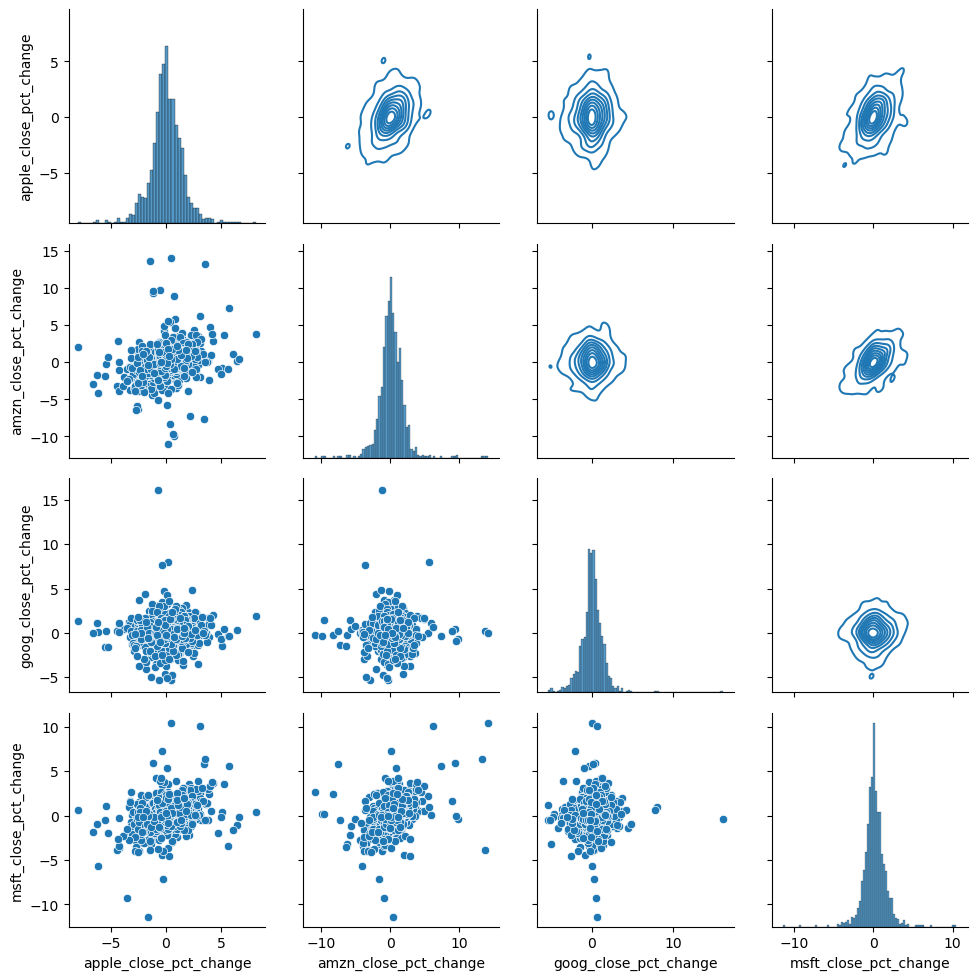

In [98]:
# Crea un PairGrid con los datos del DataFrame clsing_p
g = sns.PairGrid(data=clsing_p)

# Mapea un histograma en la diagonal
g.map_diag(sns.histplot)

# Mapea un scatterplot debajo de la diagonal
g.map_lower(sns.scatterplot)

# Mapea un kdeplot encima de la diagonal
g.map_upper(sns.kdeplot)


#### Conclusión:
    Al comparar 'AAPL_close_pct_change' con 'AMZN_close_pct_change', muestra una relación lineal hasta cierto punto.


In [99]:
# Calcula la matriz de correlación entre las columnas de porcentaje de cambio diario en el DataFrame clsing_p
clsing_p.corr()


,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000


<Axes: >

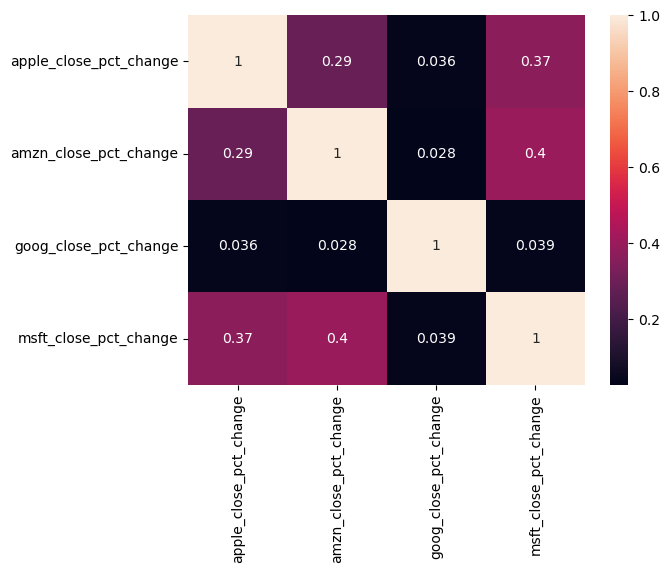

In [100]:
# Utiliza la función heatmap de seaborn para visualizar la matriz de correlación con anotaciones
sns.heatmap(clsing_p.corr(), annot=True)